In [5]:
import tensorflow
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
from cartopy import crs as ccrs, feature as cfeature
import metpy.calc as mpcalc

from scipy.ndimage import gaussian_filter
from os.path import join
import pickle
%matplotlib inline


In [6]:
tensorflow

<module 'tensorflow' from '/glade/u/home/saavedrab/.conda/envs/ptype/lib/python3.10/site-packages/tensorflow/__init__.py'>

In [7]:
rap_path = "/glade/p/cisl/aiml/conv_risk_intel/rap_ncei_height/"
rap_date = pd.Timestamp("2016-12-17 00:00:00")
rap_datetime_str = rap_date.strftime("%Y%m%d_%H%M")
rap_file = join(rap_path, rap_date.strftime("%Y%m%d"), f"rap_130_{rap_datetime_str}_000.nc")
rap_ds = xr.open_dataset(rap_file)

In [8]:
from tensorflow.keras.models import load_model

In [9]:
mod = load_model("/glade/scratch/cbecker/ptype/ptype_evidential_model.pkl/")
mod.summary()

OSError: SavedModel file does not exist at: /glade/scratch/cbecker/ptype/ptype_evidential_model.pkl//{saved_model.pbtxt|saved_model.pb}

In [13]:
mod.inputs

[<KerasTensor: shape=(None, 268) dtype=float32 (created by layer 'dense_13_input')>]

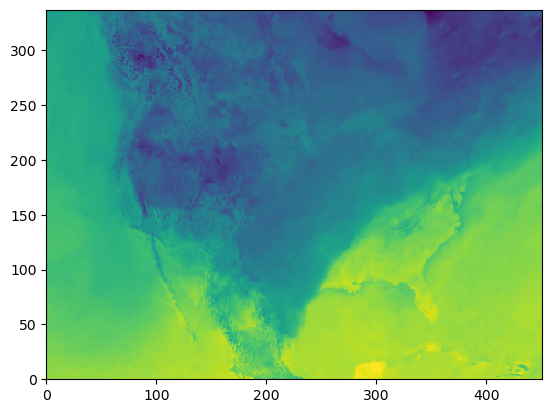

In [6]:
plt.pcolormesh(rap_ds["TMP"][0,0])

In [15]:
rap_parsed = rap_ds.metpy.parse_cf()

In [4]:
ls /glade/p/cisl/aiml/conv_risk_intel/rap_ncei_nc/20151128

grib2nc.csh*                  rap_130_20151128_1100_000.nc
grib2nc.table.new             rap_130_20151128_1200_000.nc
log.20151128                  rap_130_20151128_1300_000.nc
out.wgrib2                    rap_130_20151128_1400_000.nc
rap_130_20151128_0000_000.nc  rap_130_20151128_1500_000.nc
rap_130_20151128_0100_000.nc  rap_130_20151128_1600_000.nc
rap_130_20151128_0200_000.nc  rap_130_20151128_1700_000.nc
rap_130_20151128_0300_000.nc  rap_130_20151128_1800_000.nc
rap_130_20151128_0400_000.nc  rap_130_20151128_1900_000.nc
rap_130_20151128_0500_000.nc  rap_130_20151128_2000_000.nc
rap_130_20151128_0600_000.nc  rap_130_20151128_2100_000.nc
rap_130_20151128_0700_000.nc  rap_130_20151128_2200_000.nc
rap_130_20151128_0800_000.nc  rap_130_20151128_2300_000.nc
rap_130_20151128_0900_000.nc  submit_20151128.pbs*
rap_130_20151128_1000_000.nc


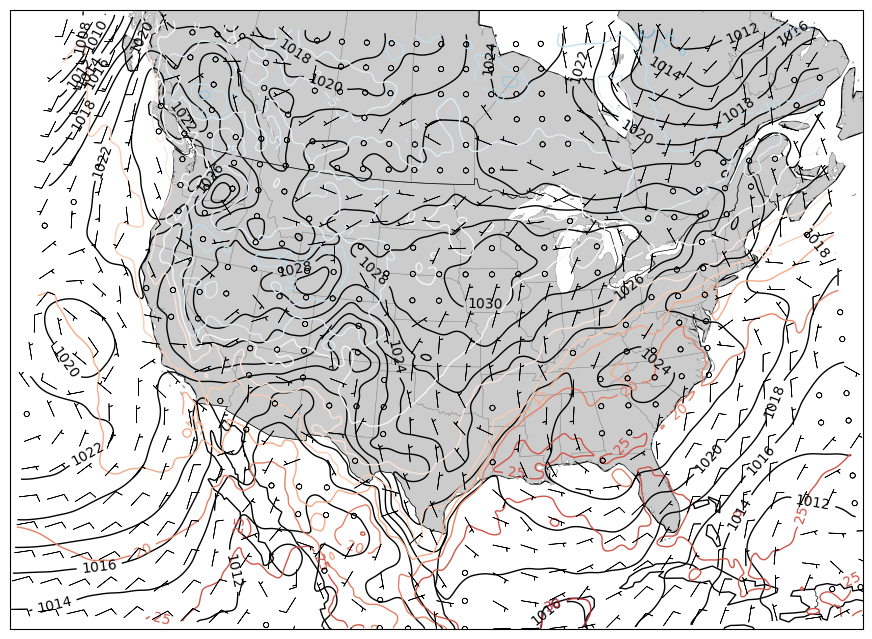

In [41]:
c_lon = -95
c_lat = 36
standard_parallels = (30, 40)
proj_lcc = ccrs.LambertConformal(central_longitude=c_lon, central_latitude=c_lat, 
                                standard_parallels=(30, 40))
fig = plt.figure(figsize=(11, 8.5))
wind_stride = 15
ax = plt.subplot(1, 1, 1, projection=proj_lcc)
ax.coastlines(resolution='110m', color='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='0.5', facecolor="0.8")
# End last line with a semicolon to suppress text output to the screen
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='k')
pres_cont = ax.contour(rap_ds["longitude"], rap_ds["latitude"], 
           gaussian_filter(rap_ds["MEAN_SEA_LEVEL"][0] / 100, 2), 
          np.arange(-970, 1100, 2), colors=['k'], linewidths=1, transform=ccrs.PlateCarree())
plt.clabel(pres_cont)
temp_cont = ax.contour(rap_ds["longitude"], rap_ds["latitude"],
                       gaussian_filter(rap_ds["TEMPERATURE_2M"][0] - 273.15, 2), 
                       np.arange(-40, 45, 5), cmap="RdBu_r", vmin=-40, vmax=40,  
                       transform=ccrs.PlateCarree(), linewidths=1)
plt.clabel(temp_cont)

ax.barbs(rap_ds["longitude"][::wind_stride, ::wind_stride].values, 
         rap_ds["latitude"][::wind_stride, ::wind_stride].values, 
         rap_ds["UGRD_10M"][0, ::wind_stride, ::wind_stride].values, 
         rap_ds["VGRD_10M"][0, ::wind_stride, ::wind_stride].values,
         transform=ccrs.PlateCarree(), zorder=5, length=5, linewidth=0.5)